# Sztuczna inteligencja

Sprawozdanie z drugiej listy na labolatoriach ze sztucznej inteligencji na 5 semestrze studiów
Informatyki Algorytmicznej w formie notatnika w pythonie. Głównym założeniem listy było zapoznanie się z
opisem zbioru danych [THE MNIST DATATBASE of handwritten digits](http://yann.lecun.com/exdb/mnist/).

## Zadanie 1

Korzystając z biblioteki TensorFlow stwórz i wytrenuj sieć neuronową rozpoznającą cyfry z podanego
zbioru danych. Odpowiedzieć na pytanie jaki współczynnik prawidłowej rozpoznawalności ma wyuczona
sieć na tym zbiorze?

Na początku zaimplementujmy odpowiednie biblioteki, które będą nam niezbędne to dalszych działań.

In [123]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image, ImageChops
import PIL.ImageOps

Załadujmy dane z zestawu danych MNIST. Pobieramy dane na których będziemy uczyć nasz model i oceniać.

In [124]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Budujemy objekt modelu, spłaszczamy dane które będzie otrzymywał to "tablicy jednowymiarowej". Następnie
tworzymy dwie warstwy wchodzące i jedną wychodzącą. Kolejnym krokiem kompilujemy nasz model używając
optymalizacji. Do tego posłużymy sie algorytmem Adam. Trenujemy naszą sieć.

In [125]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.fit(x=x_train, y=y_train, epochs=5)  # Start training process

Epoch 1/5
1875/1875 [==============================] - 2s 791us/step - loss: 1.7340 - accuracy: 0.8753

Oceniamy z jaką poprawnością wydajny jest nasz podel i drukujemy wartość na ekranie.

In [126]:
test_loss, test_acc = model.evaluate(x=x_test, y=y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 0s 509us/step - loss: 0.1734 - accuracy: 0.9578

Test accuracy: 0.9577999711036682


Teraz gdy mamy już wytrenowaną sieć neuronową, sprawdzmy dla losowej próbki jak przewiduje dla niej rozpozawanie
pisma ręcznego. Wypiszemy na ekranie dla każdej klasy, z jakim prawdopodobieństwiem model ocenia że to właśnie
ta liczba.

In [127]:
predictions = model.predict([x_test])
print(predictions[1000])

Consider rewriting this model with the Functional API.
[1.9247849e-04 1.0019179e-03 5.1833846e-05 6.0604876e-03 2.1848632e-03
 8.7920565e-04 3.6264187e-06 2.3842864e-02 3.9388065e-04 9.6538883e-01]


Teraz dla tej samej losowej liczby ze zbiory danych. Wydrukujemy z pośród powyższej tablicy, liczbę najwiekszą,
to znaczy najwiekszę prawdopodobieństwo że nasz model jest pewny, że wybrał prawidłową liczbę. Następnie zweryfikujemy
go, drukując na ekranie obrazek, na którym pracował.

9


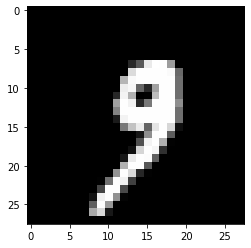

In [128]:
print(np.argmax(predictions[1000]))  # Print out the number

plt.imshow(x_test[1000], cmap="gray")  # Import the image
plt.show()  # Show the image

Jak możemy zauważyć, model z największym prawdopodobieństem wskazał, że jest to liczba 9. My ludzie widzą,
wydrukowany obrazek możemy jednoznaczeni stwierdzić, że w tym przypadku nasz model się nie pomylił.

Poniżej pracujemy tylko i wyłącznie nad graficzną interpretacją. Będziemy chcieli aby wszystkie tablice z
prawododopieństem, które wytrenował model (sieć neuronowa) były przedstawiane w postaci wykresów.

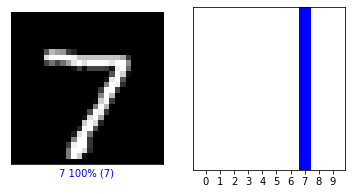

In [129]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  # plt.imshow(img, cmap=plt.cm.binary)
  plt.imshow(img, cmap="gray")

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  # print(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()


Powyżej przedstawiliśmy jak chcemy, żeby wyglądał pojedyczny puzzel na naszym wyjściu. Teraz przedstawimy
parę próbek wrz z ich przewidywaniem na zestawie z którego pobieraliśmy dane.


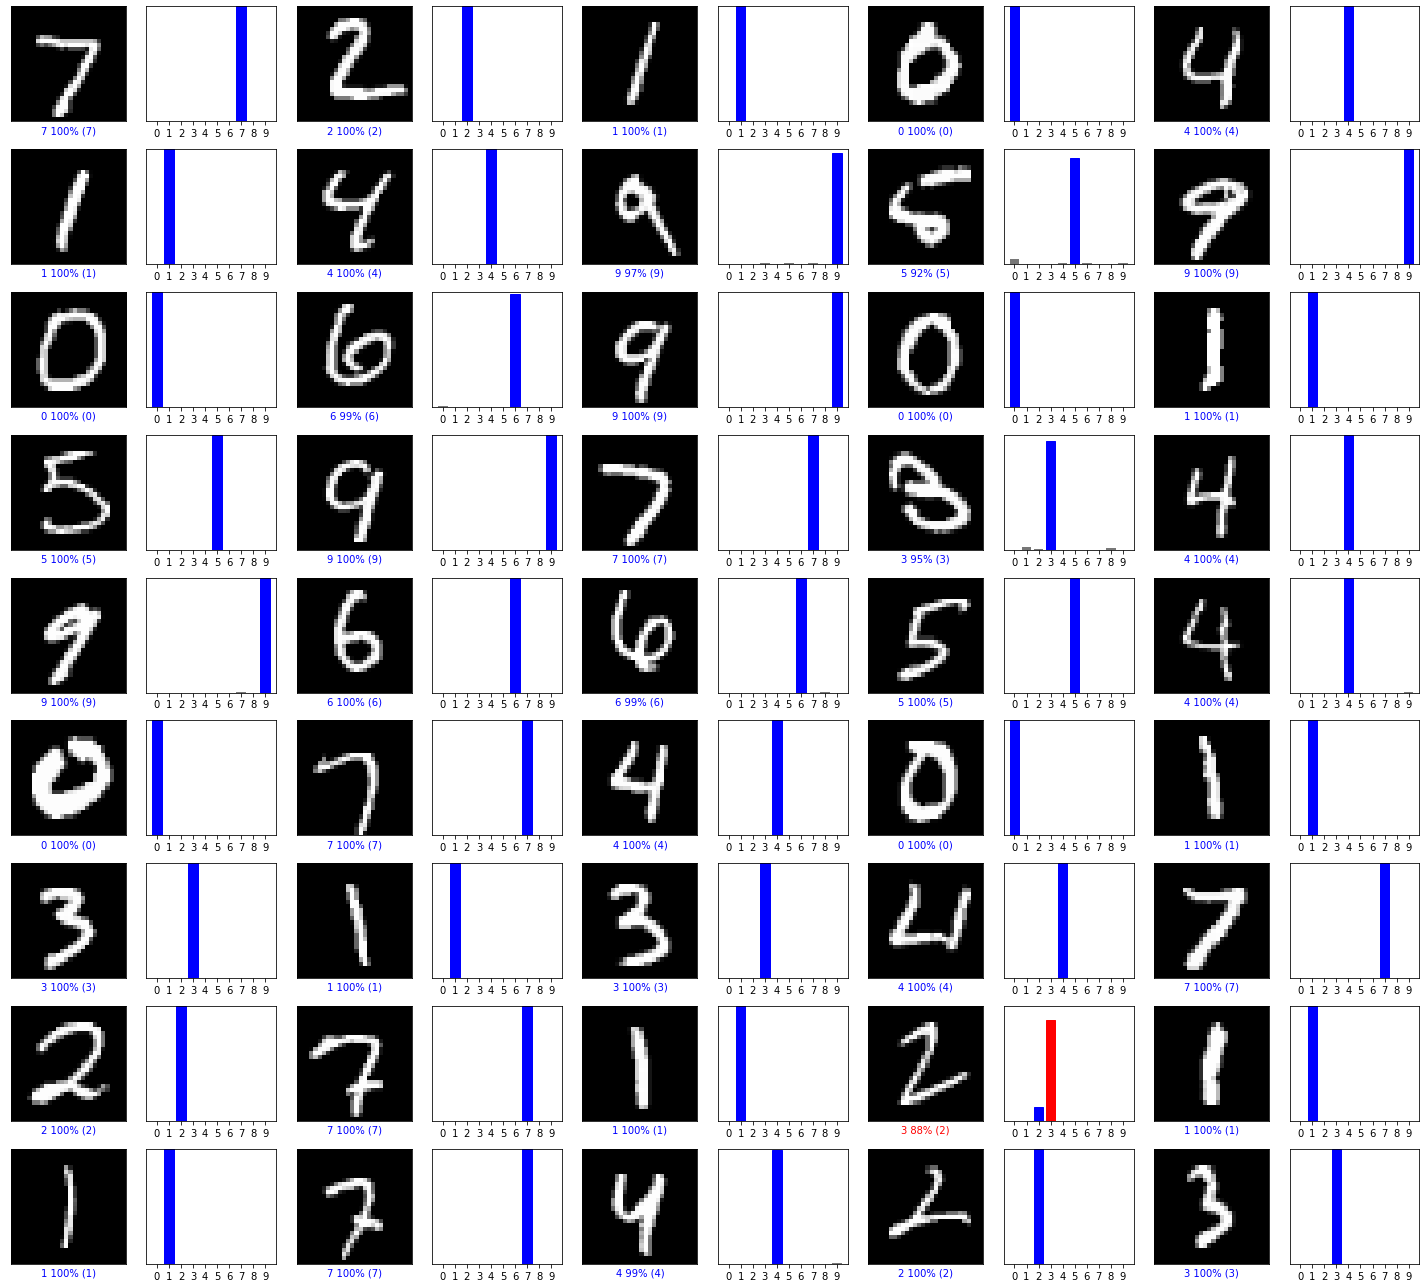

In [130]:
num_rows = 9
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

Jak widzimy powyżej, na 45 próbek model pokazał 43 poprawnie. 43/45 ~= 0,95. Przypomnijmy, że model naszz
dokładnością 0,941 poprawnie oceniał wyniki. Są to wartości bardzo bliskie sobie.

---

# Zadanie 2

Na podstawie własnych próbek pisma, stwórz swój własny zbiór testowy (co najmniej po trzy egzemplarze każdej
cyfry, zachowaj także do obejrzenia obrazy swoich próbek). Sprawdź jak sieć stworzona w poprzednim zadaniu reaguje na
ten zbiór. Opisz krótko wnioski takie jak wspołczynnik rozpoznawalności, błedy i ich prawdopodobna przyczyna, itp.)

Zmodyfikujemy poprzednią metode o rysowanie przewidywalnych wartości.

In [131]:
def plot_value_array(predictions_array, true_label):
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

Pobieramy obrazki z folderu, w którym trzymamy nasz zestaw testowy.Przetesujemy podobnie na tylko na jednej dowolnej próbce.

Consider rewriting this model with the Functional API.
2
[[8.3903461e-11 3.2521417e-05 9.9943632e-01 1.2903838e-04 8.5954400e-07
  1.1625359e-10 8.5077972e-10 2.5522156e-04 1.4607969e-04 1.0089379e-08]] 10


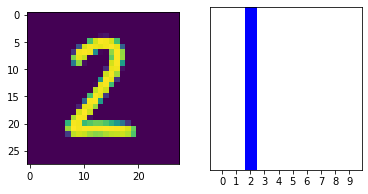

In [132]:
img2 = Image.open('mydata/myvalidation/2_1.png').convert("L")
img = np.resize(img2, (28,28,1))
im2arr = np.array(img)
im2arr = im2arr.reshape(1,28,28,1)
y_pred = model.predict([im2arr])

print(np.argmax([y_pred]))
print(y_pred, len(y_pred[0]))

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(img2)
plt.subplot(1,2,2)
plot_value_array(y_pred[0], np.argmax([y_pred]))

plt.show()

Stwórzmy funkcje która będzie nam zwracała wszystkie ścieżki do obrazków. Zwaraca krotkę ścieżek i prawidowych
wartości. Ze względu na zaimplementowane nazewnistwo, pozwala tam to ocenić po nazwie pliku.

In [133]:
def imagedir(masterdir):
    img_dirs = sorted(os.listdir(masterdir))
    dirs = []
    true_label_dirs = []

    for img_dir in img_dirs:
        dirs.append(os.path.join(masterdir, img_dir))
        true_label_dirs.append(int(img_dir[:1]))

    return dirs, true_label_dirs


Przetestujmy nasz zestaw próbek.

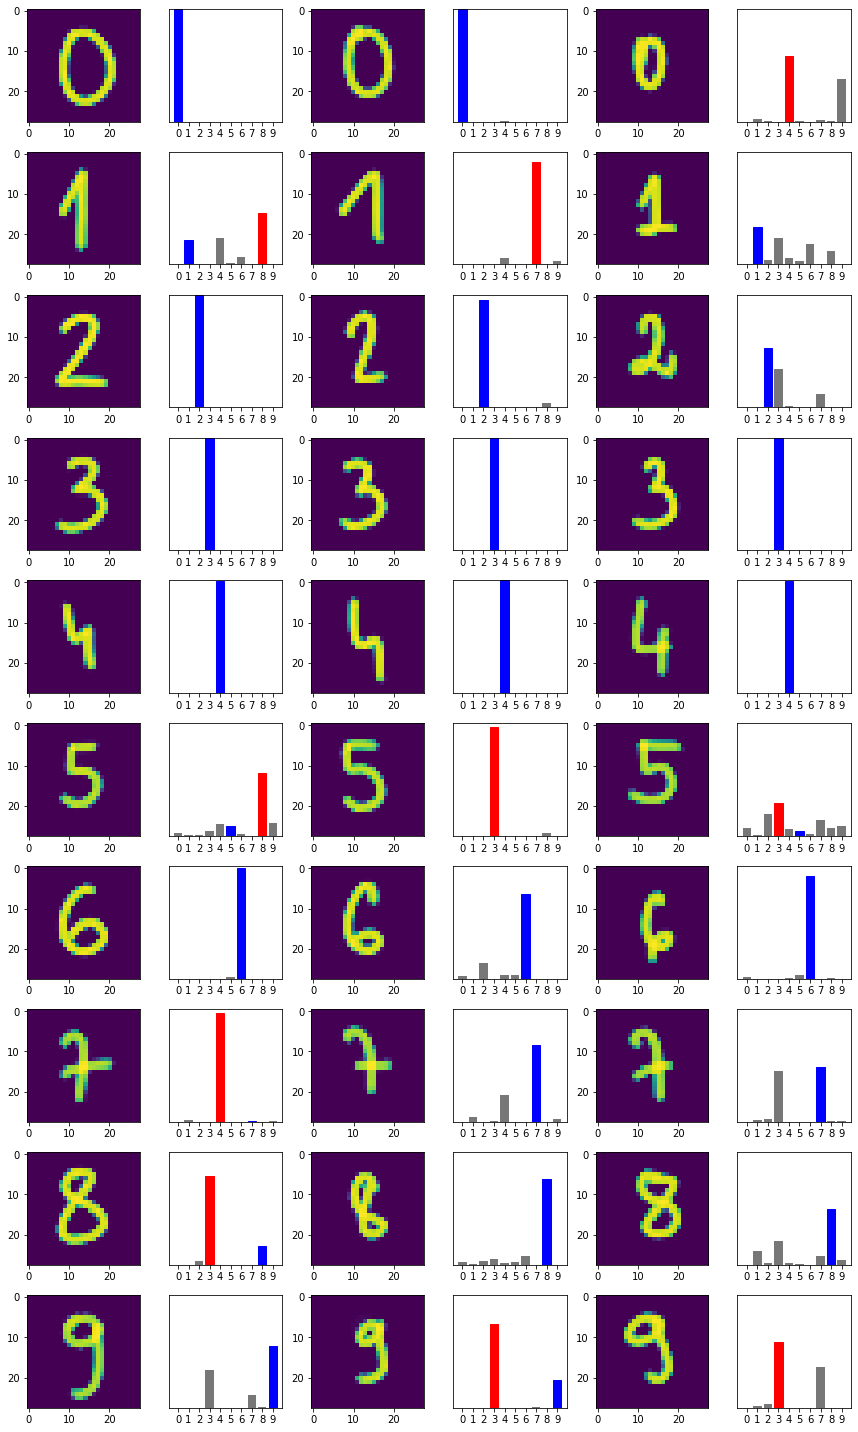

In [134]:
dirs, true_label_dirs = imagedir('mydata/myvalidation/')

num_rows = 10
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(len(dirs)):
    img2 = Image.open(dirs[i]).convert('L')
    img = np.resize(img2, (28, 28, 1))
    im2arr = np.array(img)
    im2arr = im2arr.reshape(1, 28, 28, 1)
    y_pred = model.predict([im2arr])

    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plt.imshow(img2)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(y_pred[0], true_label_dirs[i])
plt.tight_layout()
plt.show()

Wcześniej wytrenowany model przetestowany na naszych danych, na 30 próbkach poprawnie ocenił 19, co daje
współczynnik rozpoznawalności równy 0,633. Jest to gorszy wynik, od zestawów testujących MNIST. Spowodownae jest to
głownie dlatego, że zbiory są trenowane i testowane na amerykańskich liczbach. Amerykanie inaczej piszą niektóre
liczby. (np. liczbę 7 piszą bez kreseczki itp.) Właśnie dla tego przykładu model mylił się najbardziej, mówiac że
"moja 7" to 3. Podobnie duże różnice wyszły dla liczb 1, 8 i 9. Kolejne przewidywanie dla nich wyniosło 5 i 9, 6, i 5 i 7.


# Zadanie 3

Wymień się z kimś swoim zbiorem danych i powtórz poprzedni punkt dla nowych danych.

Poniżej przedstawiam wynik dla 30 próbek osoby z która się wymieniałem danymi.

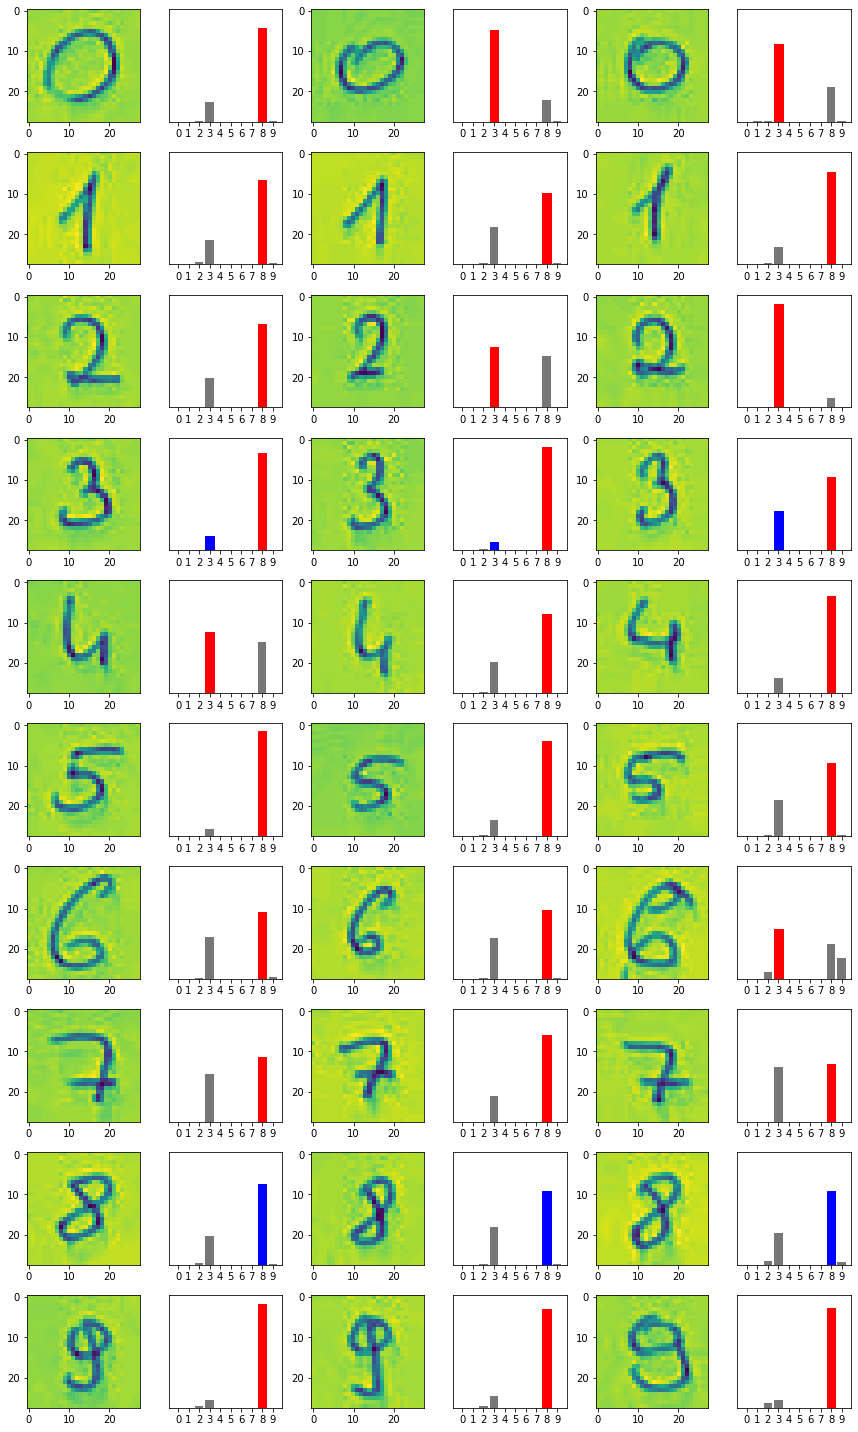

In [135]:
dirs, true_label_dirs = imagedir('mydata/friendvalidation/')

num_rows = 10
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(len(dirs)):
    img2 = Image.open(dirs[i]).convert('L')
    img = np.resize(img2, (28, 28, 1))
    im2arr = np.array(img)
    im2arr = im2arr.reshape(1, 28, 28, 1)
    y_pred = model.predict([im2arr])

    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plt.imshow(img2)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(y_pred[0], true_label_dirs[i])
plt.tight_layout()
plt.show()

Jak łatwo zauważyć, dla powyższych danych, model nie wskazał ani jednej poprawnej odpowiedzi.
Co mogło wypłynać na tak niski współczynnik rozpoznawalności? Zastanówmy się:

1. Dane które otrzymałem od kolegi, były napisane długopisem na kartce papieru, zrobione za pomocą aparatu w telefonie komórkowym. Tło dla każdego egzemplarza miało lekkie zaburzenia/zakłamania. Nie było idealne białe.
2. Tło w badanym zestawie było białe. Model trenowany na bazie danych MNIST, został wytrenowany na czarnym tle i białym foncie cyferek.

Eksperymentujmy dalej...

Zamieńmy tło dla każdego egzemplarza. To znaczy że odcien czarnego zamienamy na wartość bezwględną jego wartości minus 255.
Podobnie postępujemy z białymi odcieniami. W rezultacie otrzymujemy egzemplarze na czarnym tle. (odcieniach czarnego).
Inwersje kolorów zastosowałem wbudowaną funcją w bibliotece PIL.


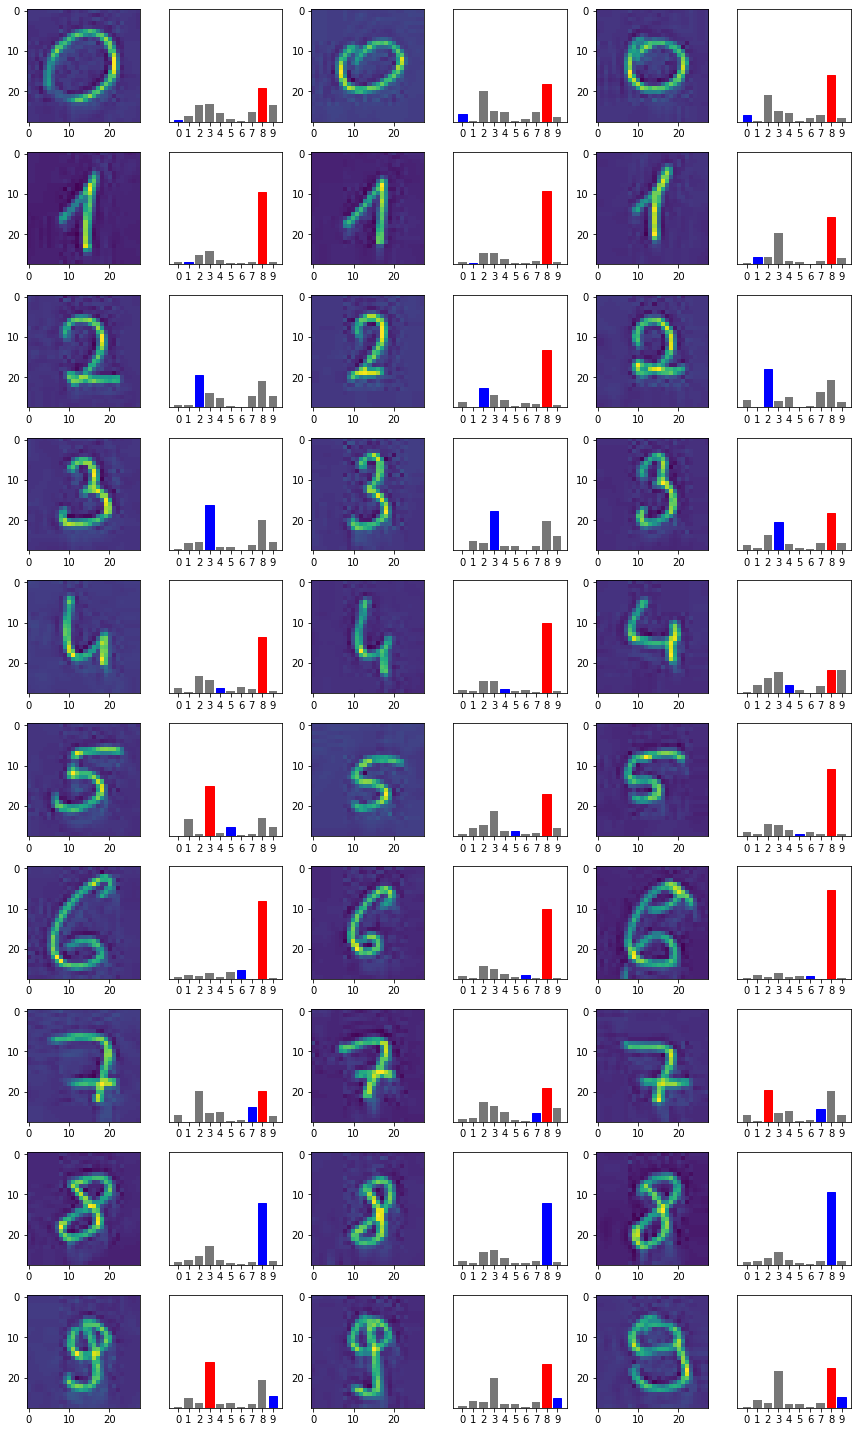

In [136]:
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(len(dirs)):
    img2 = Image.open(dirs[i]).convert('L')
    img2 = ImageChops.invert(img2)
    img = np.resize(img2, (28, 28, 1))
    im2arr = np.array(img)
    im2arr = im2arr.reshape(1, 28, 28, 1)
    y_pred = model.predict([im2arr])

    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plt.imshow(img2)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(y_pred[0], true_label_dirs[i])
plt.tight_layout()
plt.show()

Jak możemy zauważyć, model w tym przypadku zwarioał. Praktycznie dla każdego egzemplarza podawał
wyniki, które były sobie bardzo równe. To znaczy, cieżko modelowi było wyzaczyć prawidłową wartość,
z dużym prawdopodobieństem. Każda liczba wydawała mu się jednakowo taka sama. Jednak wskazał pare razy poprawny wynik
Oto porównanie z eksperymentów na białym i czarnym tle.

Współczynnik rozpoznawalności dla czarnego jest 0,23. Rozpoznał on prawidłowo 7 cyfr.

